The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, I will explore and answer several questions related to this prizewinning data.

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np


#### Loading Data

In [9]:
nobel = pd.read_csv('data/nobel.csv')
nobel

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN


#### Store and display the most commonly awarded gender and birth country in requested variables


In [10]:
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]
print("\n The gender with the most Nobel laureates is :", top_gender)
print(" The most common birth country of Nobel laureates is :", top_country)



 The gender with the most Nobel laureates is : Male
 The most common birth country of Nobel laureates is : United States of America


#### Calculate the proportion of USA born winners per decade

In [11]:
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year']/10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

#### Identify the decade with the highest proportion of US-born winners

In [ ]:
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]


2000

#### Plotting USA born winners

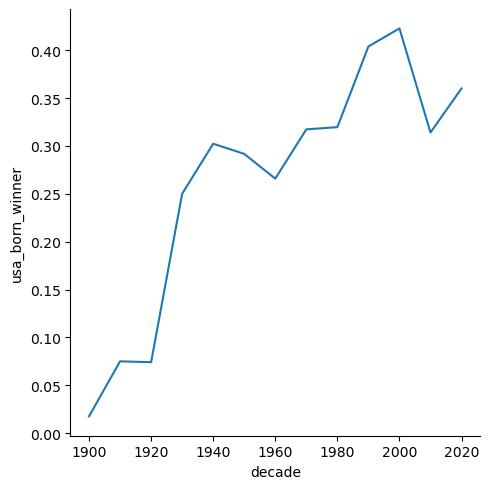

In [22]:
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")

##### Calculating the proportion of female laureates per decade

In [24]:
nobel['female_winner'] = nobel['sex'] == "Female"
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

#### Find the decade and category with the highest proportion of female laureates

In [25]:
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

##### Create a dictionary with the decade and category pair

In [26]:
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}


#### Plotting female winners with % winners on the y-axis

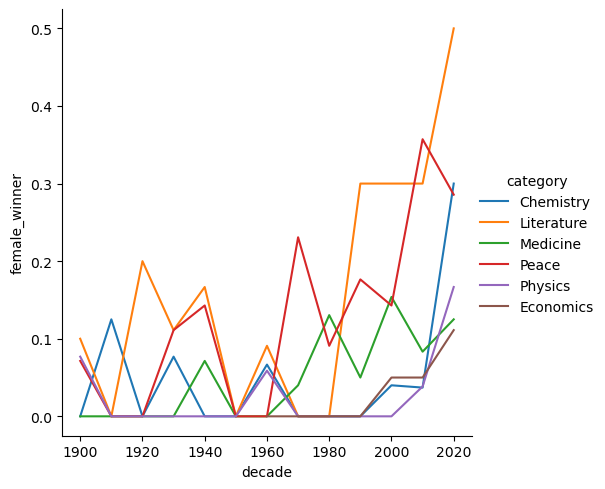

In [27]:
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")

#### Finding the first woman to win a Nobel Prize

In [29]:
nobel_women = nobel[nobel['female_winner']]
nobel_women

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,...,Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,False,1900,True
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,...,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",...,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,False,1920,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2022,Literature,The Nobel Prize in Literature 2022,"""for the courage and clinical acuity with whic...",1/1,1017,Individual,Annie Ernaux,1940-09-01,Lillebonne,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2020,True
989,2023,Medicine,The Nobel Prize in Physiology or Medicine 2023,"""for their discoveries concerning nucleoside b...",1/2,1024,Individual,Katalin Karikó,1955-01-17,Szolnok,...,Female,Szeged University,Szeged,Hungary,NaN,NaN,NaN,False,2020,True
993,2023,Physics,The Nobel Prize in Physics 2023,"""for experimental methods that generate attose...",1/3,1028,Individual,Anne L’Huillier,1958-08-16,Paris,...,Female,Lund University,Lund,Sweden,NaN,NaN,NaN,False,2020,True
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2020,True


In [31]:
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
min_row

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


In [35]:
first_woman_name = min_row['full_name'].values[0]
print(first_woman_name)

Marie Curie, née Sklodowska


In [39]:
first_woman_category = min_row['category'].values[0]
first_woman_category

'Physics'

In [40]:
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


#### Selecting the laureates that have received 2 or more prizes

In [59]:
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)
print("\n The repeat winners are :", repeat_list)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
